<a href="https://colab.research.google.com/github/rishis123/HealthTrendsCode/blob/main/HealthTrendsInitialModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **This is my preliminary attempt to explore some of the potential machine learning models for the HealthTrends.AI internship (Prophet, Kaplan Meier, SIR, ARIMA, and Poisson Regression)
The dataset used is from "https://archive.ics.uci.edu/dataset/445/absenteeism+at+work". It consists of "records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil."**


---Rishi Shah



In [ ]:
from google.colab import files
files.upload()

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


{'Absenteeism_at_work.csv': b'ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours\r\n11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;1;90;172;30;4\r\n36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0;98;178;31;0\r\n3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0;89;170;31;2\r\n7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;68;168;24;4\r\n11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;1;90;172;30;2\r\n3;23;7;6;1;179;51;18;38;239.554;97;0;1;0;1;0;0;89;170;31;2\r\n10;22;7;6;1;361;52;3;28;239.554;97;0;1;1;1;0;4;80;172;27;8\r\n20;23;7;6;1;260;50;11;36;239.554;97;0;1;4;1;0;0;65;168;23;4\r\n14;19;7;2;1;155;12;14;34;239.554;97;0;1;2;1;0;0;95;196;25;40\r\n1;22;7;2;1;235;11;14;37;239.554;97;0;3;1;0;0;1;88;172;29;8\r\n20;1;7;2;1;260;50;11;36;239.554;97;0;1;4;1;0;0;65;1

Uploaded the dataset from local machine.



In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

absent = pd.read_csv('Absenteeism_at_work.csv', delimiter=';') #semicolon is delimiter instead of comma -- just to parse correctly
absent.head(20) #display first 20 rows of dataframe

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [ ]:
print(absent)

     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                    

In [ ]:
absent['Year'] = 0

#Creating a year column for all data -- accordingly sorting based on chronology of CSV data
absent.loc[0:112, 'Year'] = int(2007)
absent.loc[113:357, 'Year'] = int(2008)
absent.loc[358:569, 'Year'] = int(2009)
absent.loc[570:736, 'Year'] = int(2010)
absent.drop(absent.index[737:], inplace=True) #dropping few values beyond timeframe (invalid)

absent.head(50)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Year
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,2007
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,2007
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,2007
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,2007
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,2007
5,3,23,7,6,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,2007
6,10,22,7,6,1,361,52,3,28,239.554,...,1,1,1,0,4,80,172,27,8,2007
7,20,23,7,6,1,260,50,11,36,239.554,...,1,4,1,0,0,65,168,23,4,2007
8,14,19,7,2,1,155,12,14,34,239.554,...,1,2,1,0,0,95,196,25,40,2007
9,1,22,7,2,1,235,11,14,37,239.554,...,3,1,0,0,1,88,172,29,8,2007



**Brief explanation of variables (from Kaggle):**


*   Month of absence
*   Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
*   Seasons (summer (1), autumn (2), winter (3), spring (4))
*   Transportation expense
*   Distance from Residence to Work (KMs)
*   Service time
*   Age
*   Work load Average/day
*   Hit target
*   Disciplinary failure (yes=1; no=0)
*   Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
*   Son (number of children)
*   Social drinker (yes=1; no=0)
*   Social smoker (yes=1; no=0)
*   Pet (number of pet)
*   Weight
*   Height
*   Body mass index
*   Absenteeism time in hours


------
I just made a year column -- note we are not given the dates by default, but rather the days of week and month of absence.

Rather than hardcode all the data -- I am only extrapolating data from month-on-month, which is likely to be more significant. As such, I am initializing data from every month to the first of it (i.e., all data from July 2007 become "2007-07-01"). This is the ds column.

I am also adding a y column, or the count of people absent during that month (e.g., y-values of every row with that ds value is initialized to the count of people with that ds value)



In [ ]:
absent['Month of absence'] = absent['Month of absence'].astype(int) #cast to integer

absent['ds'] = absent.apply(lambda row: f"{int(row['Year'])}-{int(row['Month of absence']):02d}-01", axis=1) # make date column called ds-- converting every date to first of that month
absent['ds'] = pd.to_datetime(absent['ds']) #just converts to python standard datetime (same used by Prophet)

absent['y'] = absent.groupby('ds')['ds'].transform('size')
print(absent[['Year', 'Month of absence', 'ds', 'y']].tail(50))

print(absent.shape) # 737 rows x 24 columns

     Year  Month of absence         ds   y
687  2010                 5 2010-05-01  32
688  2010                 5 2010-05-01  32
689  2010                 5 2010-05-01  32
690  2010                 5 2010-05-01  32
691  2010                 5 2010-05-01  32
692  2010                 5 2010-05-01  32
693  2010                 5 2010-05-01  32
694  2010                 5 2010-05-01  32
695  2010                 5 2010-05-01  32
696  2010                 5 2010-05-01  32
697  2010                 5 2010-05-01  32
698  2010                 5 2010-05-01  32
699  2010                 5 2010-05-01  32
700  2010                 5 2010-05-01  32
701  2010                 5 2010-05-01  32
702  2010                 5 2010-05-01  32
703  2010                 5 2010-05-01  32
704  2010                 5 2010-05-01  32
705  2010                 5 2010-05-01  32
706  2010                 6 2010-06-01  19
707  2010                 6 2010-06-01  19
708  2010                 6 2010-06-01  19
709  2010  

In [ ]:
absent_prophet = absent[['ds', 'y']]
absent_prophet = absent_prophet.groupby('ds', as_index=False).mean()
print(absent_prophet)
print(absent_prophet.shape) #37 x 2. 37 month interval and two columns of interest

           ds     y
0  2007-07-01  19.0
1  2007-08-01  21.0
2  2007-09-01  22.0
3  2007-10-01  18.0
4  2007-11-01  18.0
5  2007-12-01  15.0
6  2008-01-01  24.0
7  2008-02-01  18.0
8  2008-03-01  29.0
9  2008-04-01  20.0
10 2008-05-01  16.0
11 2008-06-01  16.0
12 2008-07-01  16.0
13 2008-08-01  18.0
14 2008-09-01  19.0
15 2008-10-01  28.0
16 2008-11-01  22.0
17 2008-12-01  19.0
18 2009-01-01  11.0
19 2009-02-01  21.0
20 2009-03-01  22.0
21 2009-04-01  13.0
22 2009-05-01  16.0
23 2009-06-01  19.0
24 2009-07-01  20.0
25 2009-08-01  15.0
26 2009-09-01  12.0
27 2009-10-01  25.0
28 2009-11-01  23.0
29 2009-12-01  15.0
30 2010-01-01  15.0
31 2010-02-01  33.0
32 2010-03-01  36.0
33 2010-04-01  20.0
34 2010-05-01  32.0
35 2010-06-01  19.0
36 2010-07-01  12.0
(37, 2)


Here, I just combine absent's duplicate rows (in terms of date) to absent_prophet -- I make a whole new dataframe so that I can use absent for other models later-on that extract from other features.

We have cleaned up and added all the columns that we need -- now we can begin with the Prophet model

In [ ]:
from prophet import Prophet
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
#setup from prophet example Jupyters

In [ ]:
# Create columns to store future predictions
for i in range(2, 13):
    absent_prophet[f'prediction_{i}_months'] = None
    absent_prophet[f'pred_lower_{i}_months'] = None
    absent_prophet[f'pred_upper_{i}_months'] = None

print(absent_prophet.shape) #37 month period. Has ds and y columns, and now prediction_1_months, prediction_2_months, etc. pred_lower_1_months, pred_lower_2_months, etc. And, pred_upper_1_months, pred_upper_2_months, etc.


(37, 35)



To evaluate the model's performance, we'll train it using historical data and test it on future data within our dataset. For instance, to make a 3-month prediction, the model will be trained on data from a 3-month window, say July, August, and September. Then, it will predict the count for the next month, which is October in this case. This predicted value will be stored in the "prediction_3_months" column corresponding to the September 1 row. We'll repeat this process using a sliding window approach, where predictions are generated for each subsequent period.

By comparing these predictions against the actual observed values, we can conduct statistical analyses to assess how accurately the model predicts different horizons. For example, if the model predicts a count of 100 for October based on data from July, August, and September, we'll compare this prediction against the actual count observed for October to gauge the model's accuracy. This iterative approach helps us understand how well the model performs across various prediction timeframes within our dataset.

In [ ]:
from prophet import Prophet
import pandas as pd

# Function to fit the model and predict future values
def fit_predict_prophet(data):
    model = Prophet()  # Initialize Prophet model
    model.fit(data.dropna())  # Fit the model with data (dropping NaN rows)

    future = model.make_future_dataframe(periods=1, freq='M')  # Create future dataframe for 1 month ahead
    forecast = model.predict(future)  # Make predictions for future dates

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Ensure columns for predictions are initialized
for i in range(1, 13):
    absent_prophet[f'prediction_{i}_months'] = pd.NA
    absent_prophet[f'pred_lower_{i}_months'] = pd.NA
    absent_prophet[f'pred_upper_{i}_months'] = pd.NA

# Iterate over the dataset for each month prediction from 1 to 12 months (window size)
for i in range(1, 13):
    for j in range(len(absent_prophet) - i):
        # Select the historical data up to the current point
        historical_data = absent_prophet.iloc[j:j + i][['ds', 'y']]

        # Skip if less than 2 non-NaN rows in historical_data
        if len(historical_data.dropna()) < 2:
            continue

        # Fit the Prophet model and predict the next month
        forecast = fit_predict_prophet(historical_data)

        # Extract the future value (prediction for the next month)
        future_value = forecast.iloc[-1]['yhat']
        future_lower = forecast.iloc[-1]['yhat_lower']
        future_upper = forecast.iloc[-1]['yhat_upper']

        # Store predictions for the current month being predicted (j + i)
        absent_prophet.at[j + i, f'prediction_{i}_months'] = future_value
        absent_prophet.at[j + i, f'pred_lower_{i}_months'] = future_lower
        absent_prophet.at[j + i, f'pred_upper_{i}_months'] = future_upper


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_57lrucd/u4aay_hz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_57lrucd/_irppclr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15303', 'data', 'file=/tmp/tmp_57lrucd/u4aay_hz.json', 'init=/tmp/tmp_57lrucd/_irppclr.json', 'output', 'file=/tmp/tmp_57lrucd/prophet_modelebibr39d/prophet_model-20240617142721.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_57lrucd/wp79vyai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_57lrucd/frr9z49k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [ ]:
print(absent_prophet)
print(absent_prophet.shape)
print(absent_prophet.keys())

           ds     y prediction_2_months pred_lower_2_months  \
0  2007-07-01  19.0                <NA>                <NA>   
1  2007-08-01  21.0                <NA>                <NA>   
2  2007-09-01  22.0           22.935488           22.935488   
3  2007-10-01  18.0           22.935473           22.935473   
4  2007-11-01  18.0            13.99999            13.99999   
5  2007-12-01  15.0                18.0                18.0   
6  2008-01-01  24.0           12.000006           12.000005   
7  2008-02-01  18.0           32.709661           32.709661   
8  2008-03-01  29.0            12.58064            12.58064   
9  2008-04-01  20.0           40.379323           40.379323   
10 2008-05-01  16.0            11.58067           11.580669   
11 2008-06-01  16.0           12.000006           12.000005   
12 2008-07-01  16.0                16.0                16.0   
13 2008-08-01  18.0                16.0                16.0   
14 2008-09-01  19.0           19.935475           19.93

Now -- let's plot the results. We first replace N/A with 0. The x-axis should be the time frame (36 months), while the y-axis should be the count value for the specific prediction we are looking at (e.g., 2 months should have a graph, 3 months should have a graph, etc.). The lower and upper bounds of the 80% confidence interval will be error bars in the graphs at each time value.

In [ ]:
#first -- we drop the one month predictor column -- needs minimum of 2 months data to predict so this is useless
absent_prophet.drop(columns=['prediction_1_months'], inplace=True)
absent_prophet.drop(columns=['pred_upper_1_months'], inplace=True)
absent_prophet.drop(columns=['pred_lower_1_months'], inplace=True)

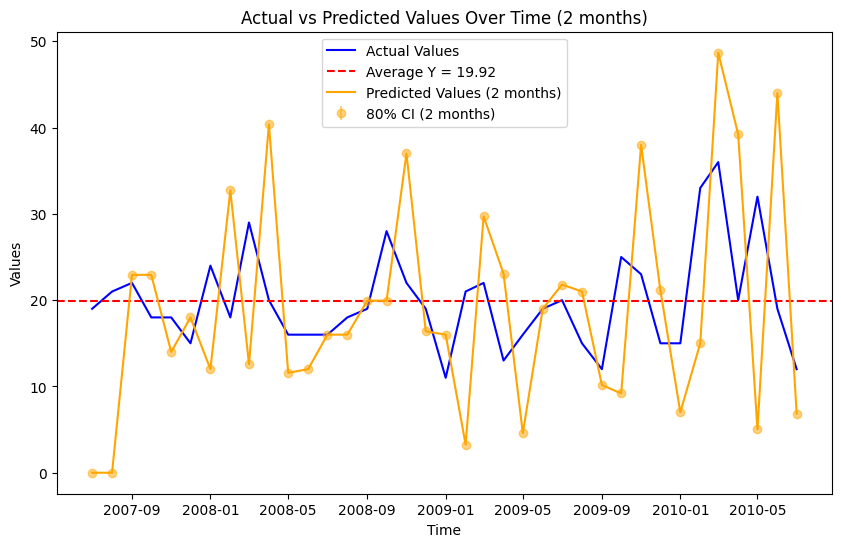

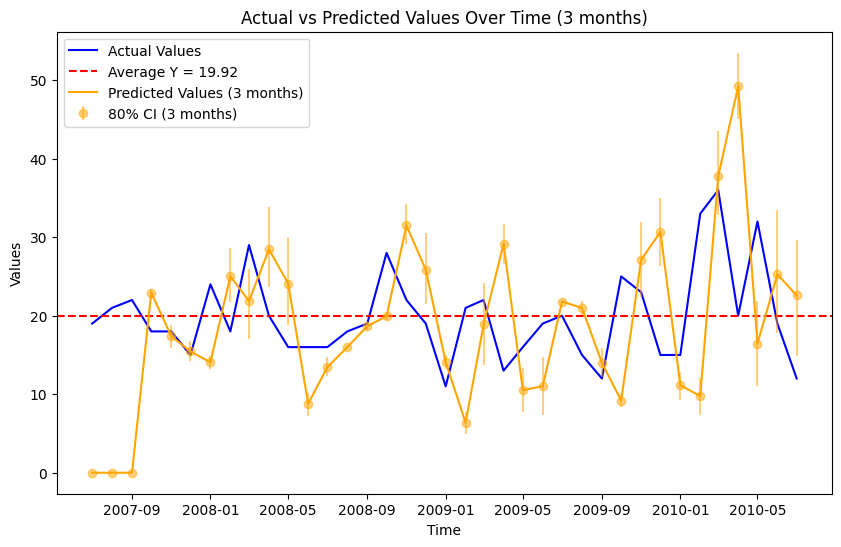

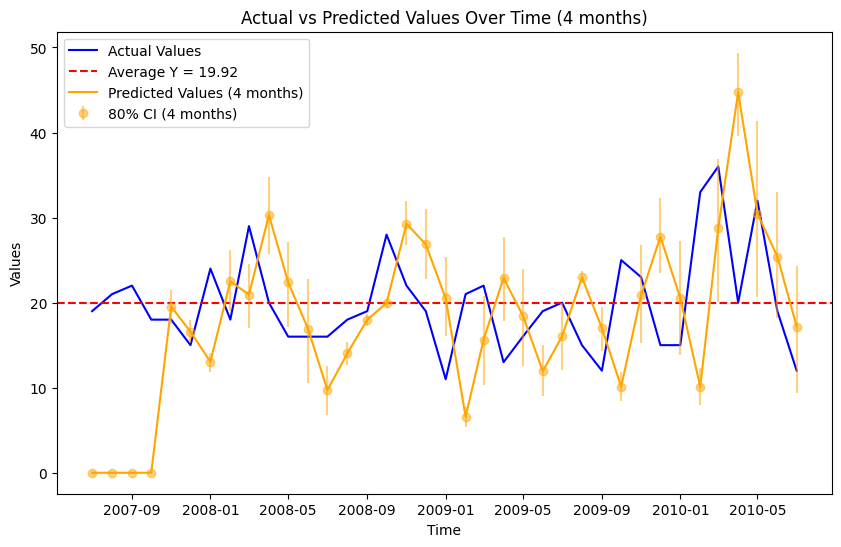

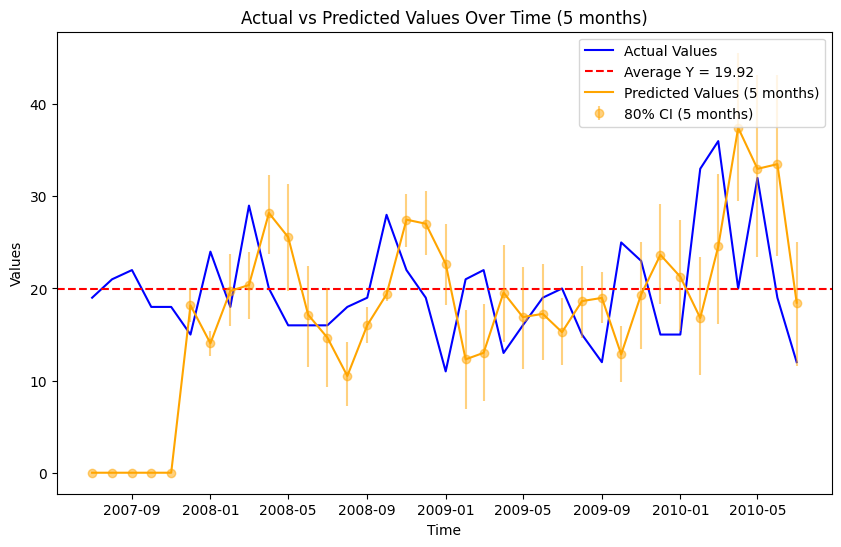

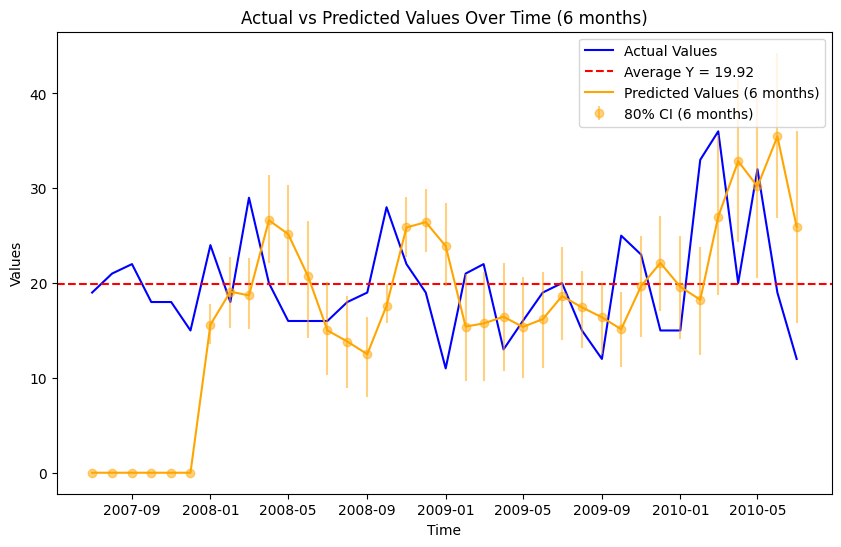

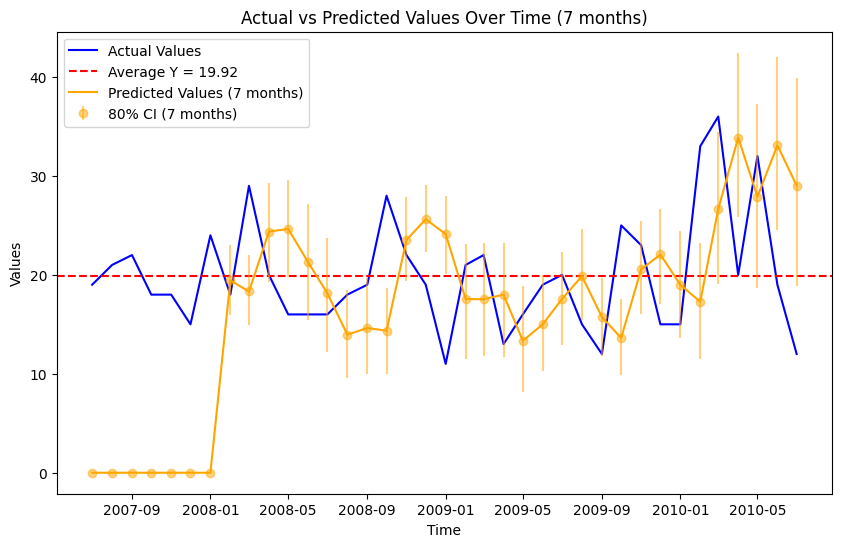

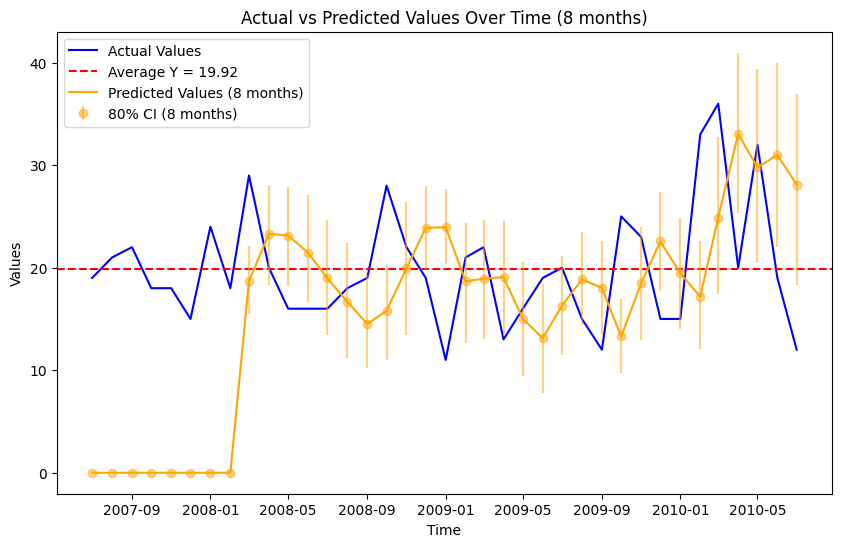

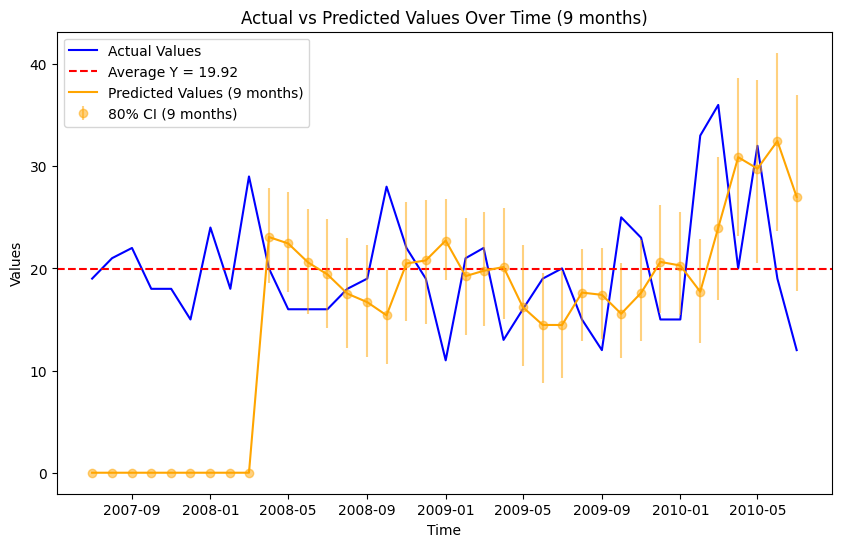

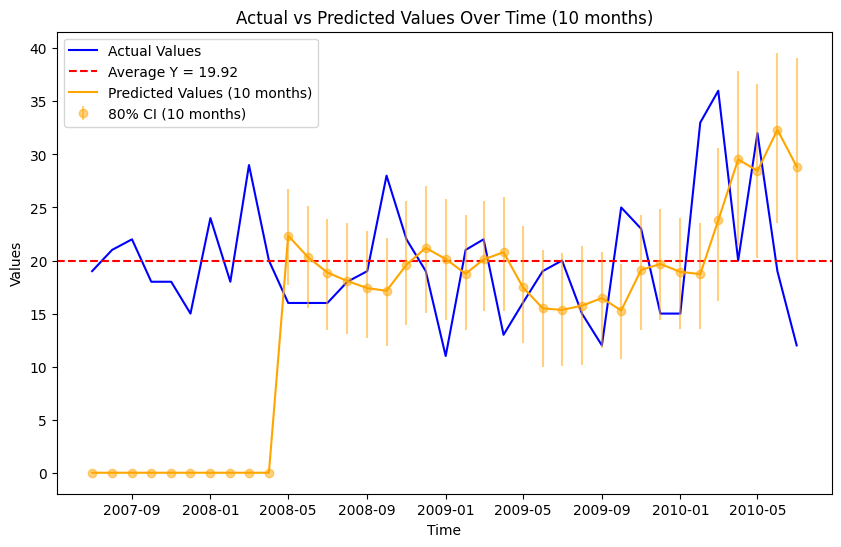

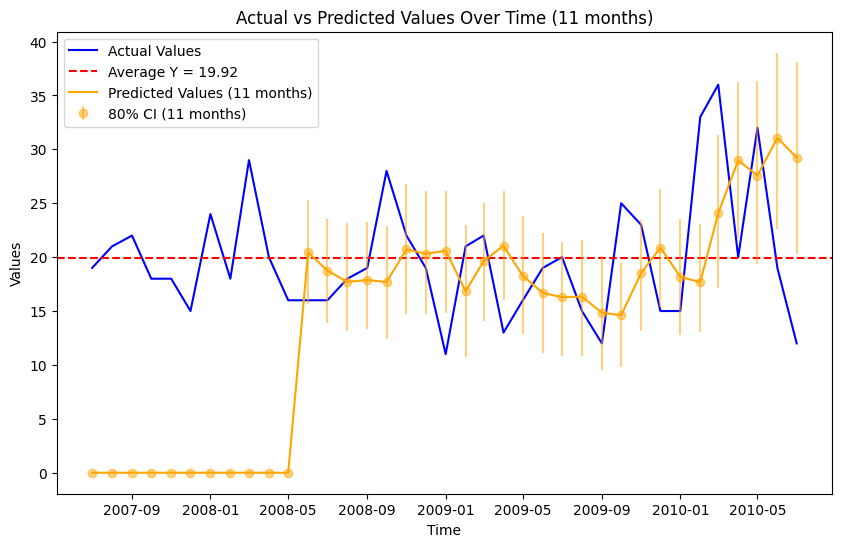

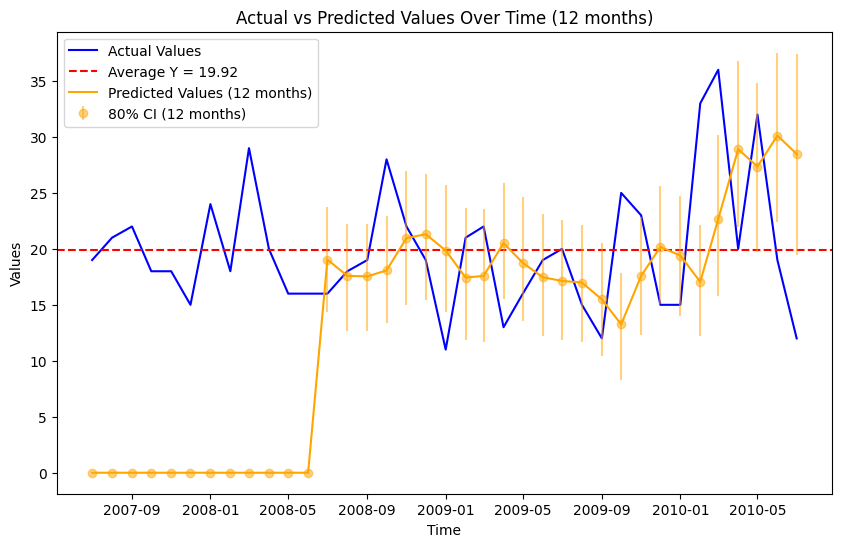

In [ ]:
# Replace NaN values in the prediction columns (note we disregard columns for 1 month prediction) with 0
for n in range(2, 13):
    pred_col = f'prediction_{n}_months'
    lower_col = f'pred_upper_{n}_months'
    upper_col = f'pred_lower_{n}_months'
    absent_prophet[pred_col].fillna(0, inplace=True)
    absent_prophet[lower_col].fillna(0, inplace=True)
    absent_prophet[upper_col].fillna(0, inplace=True)

# Plot the results for each prediction horizon
for n in range(2, 13):  #going from 2 to 12 month prediction range
    plt.figure(figsize=(10, 6))

    # Actual values plotted in blue over time
    plt.plot(absent_prophet['ds'], absent_prophet['y'], label='Actual Values', color='blue')

    # Calculate the average of y values
    average_y = absent_prophet['y'].mean()
    # Average line plotted as a horizontal line
    plt.axhline(y=average_y, color='red', linestyle='--', label=f'Average Y = {average_y:.2f}')


    # Predicted values plotted in orange over time
    pred_col = f'prediction_{n}_months' #enhance readability
    plt.plot(absent_prophet['ds'], absent_prophet[pred_col], label=f'Predicted Values ({n} months)', color='orange')

    # Error bars
    lower_col = f'pred_upper_{n}_months'
    upper_col = f'pred_lower_{n}_months'

    # Error bars (whiskers)
    lower_error = abs(absent_prophet[pred_col] - absent_prophet[lower_col])
    upper_error = abs(absent_prophet[upper_col] - absent_prophet[pred_col])

    plt.errorbar(absent_prophet['ds'], absent_prophet[pred_col],
                 yerr=[lower_error, upper_error],
                 fmt='o', color='orange', alpha=0.5, label=f'80% CI ({n} months)')


    # Labels and title
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f'Actual vs Predicted Values Over Time ({n} months)')
    plt.legend()

    # Show the plot
    plt.show()

# Without any statistical analysis yet, the visualizations are quite interesting -- smaller windows of prediction result in values that are generally more accurate, because it is less susceptible to the "lag" of longer prediction windows (e.g., the downturn in early 2008 of the actual counts is mimicked in the second half of 2008 for the 12 month predicted values, during which point the actual data is in fact rising).

#Conversely, too small a window of prediction (like 2 months), results in inaccuracies for the confidence interval error bars, as there is not enough data to conclude what the real value falls between. Moreover, the predicted values are heavily influenced by trends -- for example, for the 2 month window, the actual decline during December 2009 and increase during January 2010 is heavily "overexaggerated" by the predicted decline and increase.

In [ ]:
#Note that there are no error bars for the 2 month prediction -- exact same values for the confidence interval as the predicted value itself.
print(absent_prophet['prediction_2_months'])
print(absent_prophet['pred_lower_2_months'])
print(absent_prophet['pred_upper_2_months'])

0      0.000000
1      0.000000
2     22.935488
3     22.935473
4     13.999990
5     18.000000
6     12.000006
7     32.709661
8     12.580640
9     40.379323
10    11.580670
11    12.000006
12    16.000000
13    16.000000
14    19.935475
15    19.935475
16    36.999966
17    16.387104
18    16.000011
19     3.258047
20    29.709687
21    23.071418
22     4.580637
23    19.000004
24    21.806465
25    21.000001
26    10.161286
27     9.193552
28    37.999988
29    21.129030
30     6.999988
31    15.000000
32    48.677432
33    39.214296
34     5.032282
35    43.999978
36     6.838682
Name: prediction_2_months, dtype: float64
0      0.000000
1      0.000000
2     22.935488
3     22.935473
4     13.999990
5     18.000000
6     12.000005
7     32.709661
8     12.580640
9     40.379323
10    11.580669
11    12.000005
12    16.000000
13    16.000000
14    19.935475
15    19.935475
16    36.999966
17    16.387104
18    16.000011
19     3.258046
20    29.709687
21    23.071418
22     4.58063

We will approach statistics later -- for the time being, we consider another model: the ARMA/ARIMA suite which excel in outlier/seasonality handling. In the choice between the two, the ARIMA is better suited for non-stationary data (with a changing mean over time) -- we determine below whether this is the case.

https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/#.
The method is described further here: we will set an alpha-level of 0.05, meaning p>0.05 will fail to reject the null hypothesis of non-stationary data, else p<=0.05 will support the alternate hypotehsis of stationary data.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extracting the 'y' column which contains the time series values
values = absent_prophet['y']

# Passing the extracted values to the adfuller function
res = adfuller(values)


# Printing the statistical result of the adfuller test
print('Augmented Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmented Dickey_fuller Statistic: -4.774739
p-value: 0.000061
critical values at different levels:
	1%: -3.627
	5%: -2.946
	10%: -2.612


The Augmented Dickey Fuller test yielded a p-value of 0.000061, strongly supporting the data is stationary.

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf. This explains the next steps -- checking ACF vs PACF, to further determine if both the AR and MA models (individual compoennts of the ARMA model) are suited to the dataset. ACF differs from PACF as it includes intermediary lag/period's effects on the period of prediction, unlike the PACF coefficient for just a single lag.

In [ ]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time

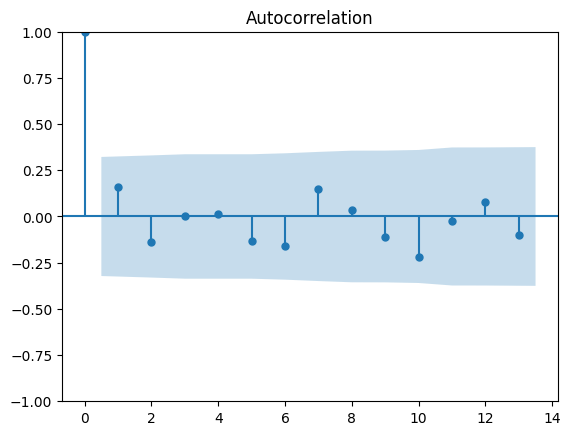

In [ ]:
acf_plot = plot_acf(absent_prophet.y, lags=13) # we take a 13 month lag as our maximum -- as we don't want to exceed number of periods in our data


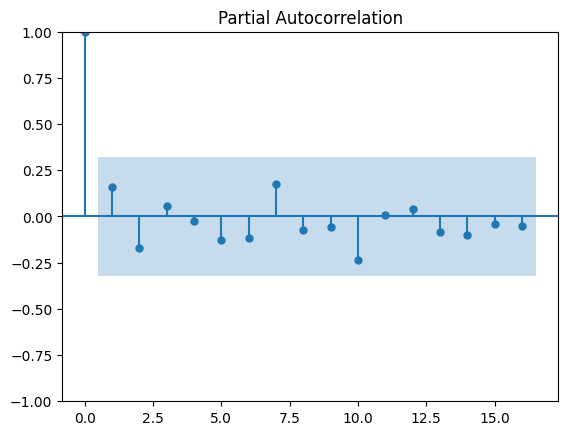

In [ ]:
pacf_plot = plot_pacf(absent_prophet.y)


Neither the ACF nor PACF have significant lags (values with correlations beyond the shaded blue region) -- this means the ARMA model is likely not a good fit. We consider other models that can fit better.

First, we look at the Poisson regression. Our data is count data, so that requirement is met.

We next check the following requirements:

Examine the Mean and Variance: Check if the mean and variance of the dependent variable are approximately equal.
Check for Overdispersion: Compare the deviance or use a test for overdispersion.
Check for Independence: Ensure observations are independent.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

check_mean_variance = absent_prophet[['y']]
print(check_mean_variance)

mean_absent = check_mean_variance.mean()
var_absent = check_mean_variance.var()
print(f'Mean: {mean_absent}, Variance: {var_absent}')

       y
0   19.0
1   21.0
2   22.0
3   18.0
4   18.0
5   15.0
6   24.0
7   18.0
8   29.0
9   20.0
10  16.0
11  16.0
12  16.0
13  18.0
14  19.0
15  28.0
16  22.0
17  19.0
18  11.0
19  21.0
20  22.0
21  13.0
22  16.0
23  19.0
24  20.0
25  15.0
26  12.0
27  25.0
28  23.0
29  15.0
30  15.0
31  33.0
32  36.0
33  20.0
34  32.0
35  19.0
36  12.0
Mean: y    19.918919
dtype: float64, Variance: y    33.90991
dtype: float64


The data indicates the variance exceed  the mean, i.e., overdispersion.

The Poisson model assumes that the mean and variance of the errors are equal. But usually in practice the variance of the errors is larger than the mean (although it can also be smaller). When the variance is larger than the mean, there are two extensions of the Poisson model that work well. In the over-dispersed Poisson model, an extra parameter is included which estimates how much larger the variance is than the mean. This parameter estimate is then used to correct for the effects of the larger variance on the p-values. An alternative is a negative binomial model. The negative binomial distribution is a form of the Poisson distribution in which the distribution’s parameter is itself considered a random variable. The variation of this parameter can account for a variance of the data that is higher than the mean. - from https://www.theanalysisfactor.com/regression-models-for-count-data/



https://nbviewer.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb for adding additinoal regressors to prophet

NEXT STEP -- COMPARE AMERICAN CDC WASTEWATER DATASET AND HOSPITALIZATION. IF THERE IS A STRONG RELATIONSHIP, CONDUCT TIME SERIES ANALYSIS ON HOSPITALIZATION WITH WASTEWATER DATASET AS A REGRESSOR